In [36]:
import torch
import torch.nn as nn
import torchvision.datasets as dset
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torch.autograd import Variable
import matplotlib.pyplot as plt
%matplotlib inline

mnist_train=dset.MNIST('',train=True,transform=transforms.ToTensor(), target_transform=None, download=True) = 
mnist_test=dset.MNIST('',train=False,transform=transforms.ToTensor(), target_transform=None, download=True)

SyntaxError: invalid syntax (<ipython-input-36-3f55c3188fb8>, line 10)

mnist_train 길이: 60000
mnist_test 길이: 10000
image data 형태: torch.Size([1, 28, 28])
label: 5


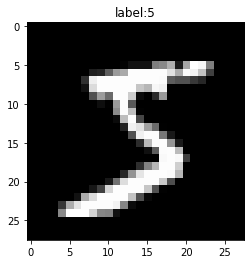

In [8]:
print('mnist_train 길이:',len(mnist_train))
print('mnist_test 길이:',len(mnist_test))

img, label = mnist_train.__getitem__(0)
print('image data 형태:', img.size())
print('label:',label)

plt.title('label:%d' %label)
plt.imshow(img[0],cmap='gray')
plt.show()

5
torch.Size([1, 28, 28])
5


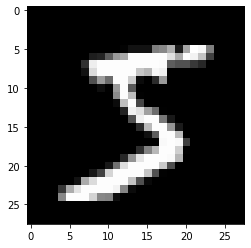

0


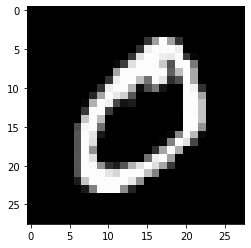

4


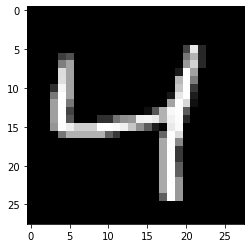

In [10]:
print(mnist_train[0][1])
print(mnist_train[0][0].size())

for i in range(3):
    img = mnist_train[i][0]
    print(mnist_train[i][1])
    plt.imshow(img[0],cmap='gray')
    plt.show()

torch.Size([1, 1, 28, 28])
5
torch.Size([1, 3, 28, 28])


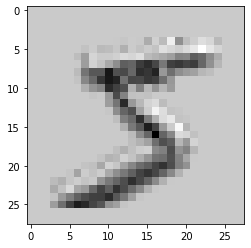

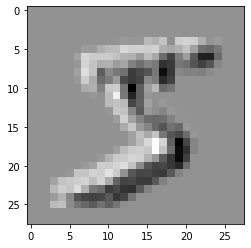

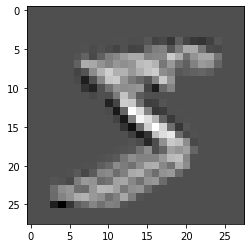

In [13]:
img, label = mnist_train[0]
img=img.view(-1,img.size()[0],img.size()[1],img.size()[2])
print(img.size())
print(label)

conv_layer=nn.Conv2d(in_channels=1,out_channels=3,kernel_size=3,padding=1)
output=conv_layer(Variable(img))
print(output.size())

for i in range(3):
    plt.imshow(output[0,i,:,:].data.numpy(),cmap='gray')
    plt.show()

In [14]:
import numpy as numpy
import torch.optim as optim

batch_size = 16
learning_rate = 0.0002
epoch = 10

In [16]:
train_loader = torch.utils.data.DataLoader(list(mnist_train)[:batch_size*100],batch_size=batch_size,shuffle=True, num_workers=2, drop_last=True)
test_loader = torch.utils.data.DataLoader(mnist_test,batch_size=batch_size,shuffle=False, num_workers=2, drop_last=True)

In [40]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN,self).__init__()
        self.layer=nn.Sequential(
            nn.Conv2d(1,16,5,padding=2),#28*28
            nn.ReLU(),

            nn.Conv2d(16,32,5,padding=2),#28*28
            nn.ReLU(),
            nn.MaxPool2d(2,2),#14*14

            nn.Conv2d(32,64,5,padding=2),#14*14
            nn.ReLU(),
            nn.MaxPool2d(2,2)#7*7
        )
        self.fc_layer=nn.Sequential(
            nn.Linear(64*7*7,100),
            nn.ReLU(),
            nn.Linear(100,10)
        )

    def forward(self,x):
        out = self.layer(x)
        out = out.view(batch_size,-1)
        out = self.fc_layer(out)

        return out

model = CNN().cuda()

In [41]:
torch.set_printoptions(edgeitems=2,threshold=50)
for parameter in model.parameters():
    print(parameter.shape)
    # print(parameter)

torch.Size([16, 1, 5, 5])
torch.Size([16])
torch.Size([32, 16, 5, 5])
torch.Size([32])
torch.Size([64, 32, 5, 5])
torch.Size([64])
torch.Size([100, 3136])
torch.Size([100])
torch.Size([10, 100])
torch.Size([10])


In [42]:
loss_func = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [46]:
for i in range(epoch):
    for j, (img,label) in enumerate(train_loader):
        x = Variable(img).cuda()
        y_=Variable(label).cuda()

        optimizer.zero_grad()
        output = model.forward(x)
        loss = loss_func(output,y_)
        loss.backward()
        optimizer.step()

        if j%50==0:
            print(loss, j, i)

tensor(0.2696, device='cuda:0', grad_fn=<NllLossBackward>) 0 0
tensor(0.0323, device='cuda:0', grad_fn=<NllLossBackward>) 50 0
tensor(0.0250, device='cuda:0', grad_fn=<NllLossBackward>) 0 1
tensor(0.0027, device='cuda:0', grad_fn=<NllLossBackward>) 50 1
tensor(0.0011, device='cuda:0', grad_fn=<NllLossBackward>) 0 2
tensor(0.0033, device='cuda:0', grad_fn=<NllLossBackward>) 50 2
tensor(0.0048, device='cuda:0', grad_fn=<NllLossBackward>) 0 3
tensor(0.0051, device='cuda:0', grad_fn=<NllLossBackward>) 50 3
tensor(0.1111, device='cuda:0', grad_fn=<NllLossBackward>) 0 4
tensor(0.0140, device='cuda:0', grad_fn=<NllLossBackward>) 50 4
tensor(0.0026, device='cuda:0', grad_fn=<NllLossBackward>) 0 5
tensor(0.0109, device='cuda:0', grad_fn=<NllLossBackward>) 50 5
tensor(0.0020, device='cuda:0', grad_fn=<NllLossBackward>) 0 6
tensor(0.0009, device='cuda:0', grad_fn=<NllLossBackward>) 50 6
tensor(0.0005, device='cuda:0', grad_fn=<NllLossBackward>) 0 7
tensor(0.0005, device='cuda:0', grad_fn=<NllLoss

In [48]:
torch.save(model, 'nets/mycnn_model_%d.pkl' %epoch)
try:
    model=torch.load('nets/mycnn_model_10.pkl')
    print('model load')
except:
    print('model not restored')

model load


In [50]:
def ComputeAccr(dloader,imodel):
    correct = 0
    total = 0

    for j,(imgs,labels) in enumerate(dloader):
        img=Variable(imgs).cuda()
        label =Variable(labels).cuda()

        output = imodel.forward(img)
        _,output_index = torch.max(output,1)

        total += label.size(0)
        correct+= (output_index==label).sum().float()
    print('Accuracy of Test Data : {}'.format(100*correct/total))

ComputeAccr(test_loader,model)

Accuracy of Test Data : 95.43000030517578
